# Demo1: Simple Harmonic Oscillator

In this jupyter notebook, we will learn how to use the Euler's method to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
x^{t^{n+1}} = x^{t^n} + v^{t^n} \times \Delta t,
$$
and 
$$
v^{t^{n+1}} = v^{t^n} + a^{t^n} \times \Delta t.
$$

### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: 
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("tableau-colorblind10")
# plt.style.use("seaborn-v0_8-colorblind")
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = ":"

In [2]:
# This is a simple example of how to solve a simple harmonic oscillator using the Euler method
# https://acme.byu.edu/00000179-af79-d5e1-a97b-bf796ef60000/ivp2020-pdf
# Step 1: set up the parameters of the problem
A = 1
k = 1
m = 1
omega_0 = np.sqrt(k / m)
dt = 0.01
t_0 = 0
t_f = 20

# Step 2: set up the time and solution arrays
t_span = np.arange(t_0, t_f, dt)
x = np.zeros_like(t_span)
v = np.zeros_like(t_span)

# Step 3: set up the initial conditions
x[0] = 1
v[0] = 0

# Step 4: solve the difference equation using the Euler method
for i, t in enumerate(t_span[:-1]):
    x[i + 1] = x[i] + dt * v[i]
    v[i + 1] = v[i] + dt * (-k / m) * x[i]

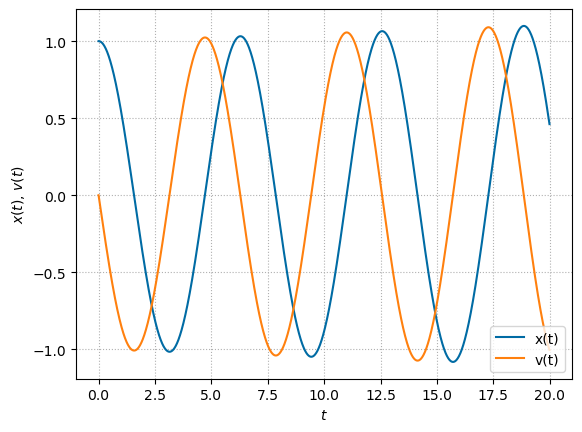

In [3]:
# Step 5: plot the solution
fig, ax = plt.subplots()
ax.plot(t_span, x, label=r"x(t)")
ax.plot(t_span, v, label=r"v(t)")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$, $v(t)$")
ax.legend()

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).
$$

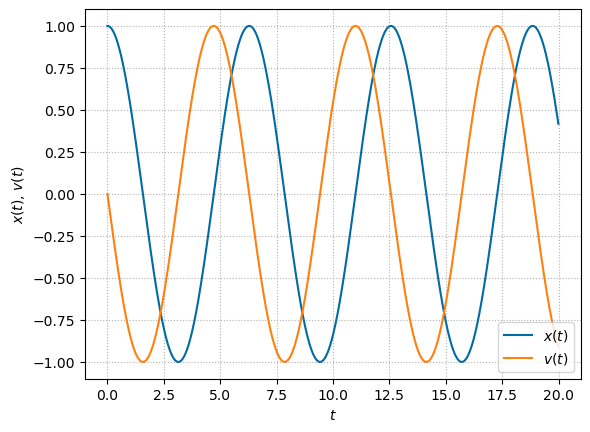

In [4]:
# Step 6: evaluate the analytical solution and plot it
phi = 0
delta = 0
x_analytic = A * np.cos(omega_0 * t_span + phi)
v_analytic = -A * omega_0 * np.sin(omega_0 * t_span + delta)
fig, ax = plt.subplots()
ax.plot(t_span, x_analytic, label=r"$x(t)$")
ax.plot(t_span, v_analytic, label=r"$v(t)$")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$, $v(t)$")
ax.legend()

Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

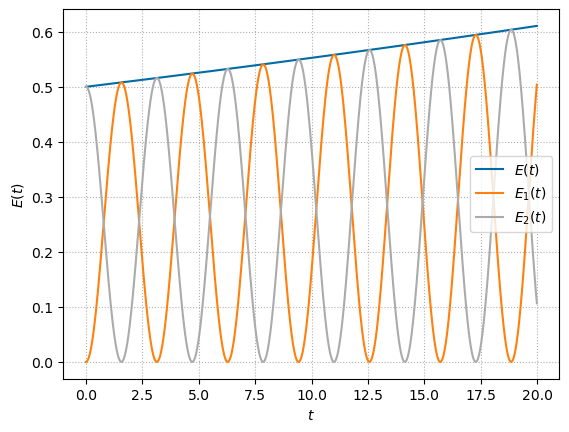

In [5]:
# Step 7: evaluate the energy (error) of the system
# https://young.physics.ucsc.edu/115/ode_solve.pdf
E = (1 / 2) * m * v**2 + (1 / 2) * k * x**2
E_1 = (1 / 2) * m * v**2
E_2 = (1 / 2) * k * x**2
fig, ax = plt.subplots()
ax.plot(t_span, E, label=r"$E(t)$")
ax.plot(t_span, E_1, label=r"$E_1(t)$")
ax.plot(t_span, E_2, label=r"$E_2(t)$")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$E(t)$")
ax.legend()

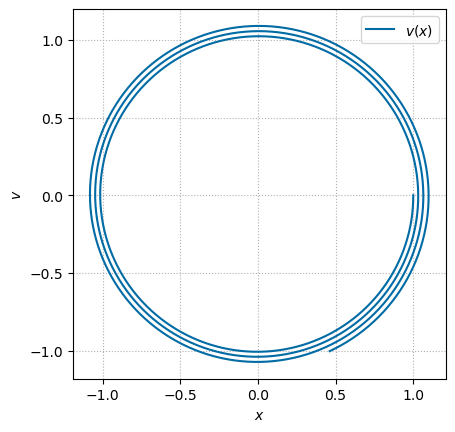

In [6]:
# Step 8: evaluate the phase space
fig, ax = plt.subplots()
ax.plot(x, v, label=r"$v(x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$v$")
ax.set_aspect("equal")
ax.legend()

We could also check by plotting the numerical solution and analytical solution superimposed on each other.

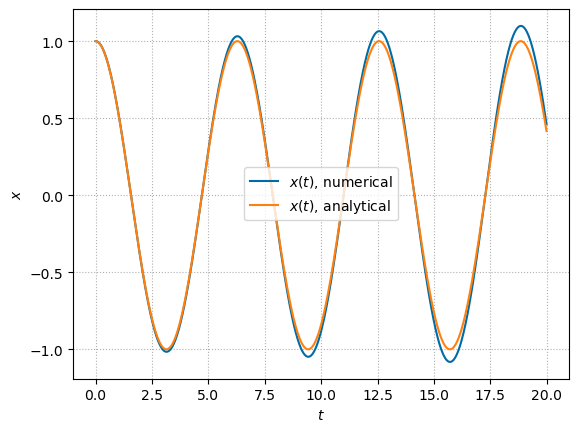

In [7]:
fig, ax = plt.subplots()
ax.plot(t_span, x, label=r'$x(t)$, numerical')
ax.plot(t_span, x_analytic, label=r'$x(t)$, analytical')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.legend()

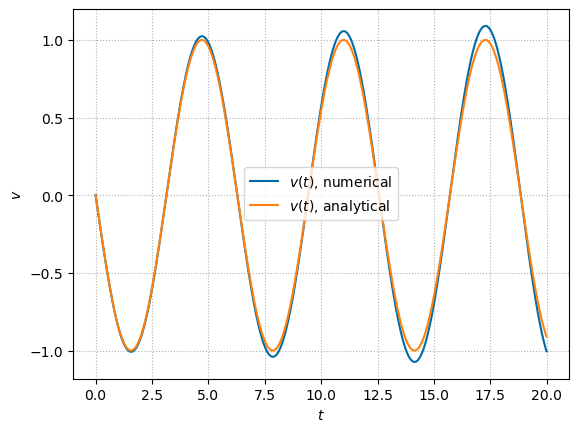

In [8]:
fig, ax = plt.subplots()
ax.plot(t_span, v, label=r'$v(t)$, numerical')
ax.plot(t_span, v_analytic, label=r'$v(t)$, analytical')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$v$')
ax.legend(loc='center')

Or by plotting the difference between numerical and analytical solutions.

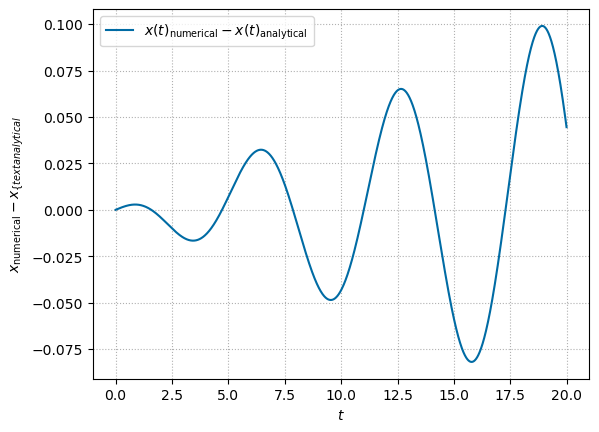

In [9]:
fig, ax = plt.subplots()
ax.plot(t_span, x - x_analytic, label=r'$x(t)_{\text{numerical}} - x(t)_{\text{analytical}}$')
# ax.plot(t_span, x_analytic, label=r'x(t), analytical')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x_{\text{numerical}} - x_{\{text{analytical}}$')
ax.legend()

## Exercise 2: 
Check if the accuracy can be improved by reducing the time step to $\Delta t=0.001$.

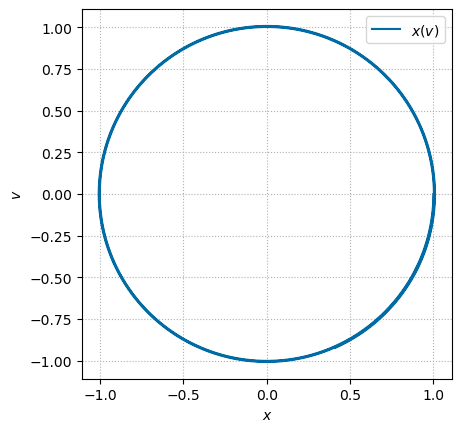

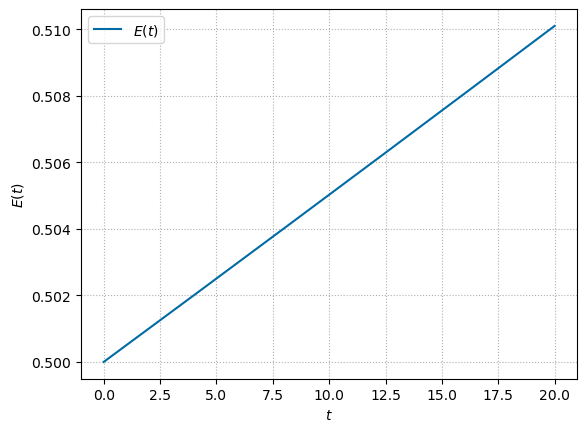

In [10]:
# Step 1: set up the parameters of the problem
A = 1
k = 1
m = 1
omega_0 = np.sqrt(k / m)
dt = 0.001
t_0 = 0
t_f = 20

# Step 2: set up the time and solution arrays
t_span = np.arange(t_0, t_f, dt)
x = np.zeros_like(t_span)
v = np.zeros_like(t_span)

# Step 3: set up the initial conditions
x[0] = 1
v[0] = 0

# Step 4: solve the difference equation using the Euler method
for i, t in enumerate(t_span[:-1]):
    x[i + 1] = x[i] + dt * v[i]
    v[i + 1] = v[i] + dt * (-k / m) * x[i] 

fig, ax = plt.subplots()
ax.plot(x, v, label=r'$x(v)$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$v$')
ax.set_aspect('equal')
ax.legend()

E = (1 / 2) * m * v**2 + (1 / 2) * k * x**2
E_1 = (1 / 2) * m * v**2
E_2 = (1 / 2) * k * x**2

fig, ax = plt.subplots()
ax.plot(t_span, E, label=r'$E(t)$')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$E(t)$')
ax.legend()

### Note

Reducing the time step is not the best solution. The better solution is to use higher-order schemes. Do NOT use Eulter's method in any production runs. 